In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Dane

In [17]:
# funkcje
def f1(x):
    return np.sin(x)
def f2(x):
    return np.sin(1/x)
def f3(x):
    return np.sign(np.sin(8*x))
x = np.linspace(-np.pi,np.pi,100)
y1 = f1(x)
y2 = f2(x)
y3 = f3(x)

# Kernele

In [18]:
def k1 (x0, x, w):
    y=np.zeros(len(x))
    for i in range(len(x)):
        if x[i] >= x0 and x[i] <= x0 + w:
            y[i]=1
        else:
            y[i]=0
    return y

In [19]:
def k2(x0, x, w):
    y=np.zeros(len(x))
    for i in range(len(x)):
        if x[i] >= (x0 - (w/2)) and x[i] <= (x0 + (w/2)):
            y[i]=1
        else:
            y[i]=0
    return y

In [20]:
def k3(x0,x,w):
    y=np.zeros(len(x))
    for i in range(len(x)):
        t = (x[i]-x0)/w
        if t <= -1 or t >= 1:
            y[i] = 0
        else:
            y[i]=1-np.abs(t)
    return y

# Interpolacja 1D

In [21]:
def interpolacja1D(x,y,k,s):
    x_new = np.zeros(s*len(x))
    y_new = np.zeros(s*len(x))
    k_table = np.zeros(s*len(x))
    w = x[1] - x[0]
    krok = 0 
    for i in range(0,len(x_new),s):
        x_new[i] = x[krok]
        for j in range(0,s-1,1):
            x_new[i+j+1] = x[krok] + (j+1)*(w/s)
        krok+=1
    for i in range(len(x)):
        k_ = np.zeros(len(x_new))
        if k=="k1":
            k_ = k1(x[i],x_new,w)
        elif k=="k2":
            k_ = k2(x[i],x_new,w)
        elif k=="k3":
            k_ = k3(x[i],x_new,w)
        else:
            print("wrong kernel")
        k_table += k_
        y_new += k_ * y[i]
    for i in range(len(y_new)):
        if k_table[i] != 0:
            y_new[i] /= k_table[i]
    return x_new, y_new

# Mean Squared Error

In [22]:
def MSE(y,y_):
    sum = 0
    for i in range(len(y)):
        sum += (y[i]-y_[i])*(y[i]-y_[i])
    return sum/len(y)

# 1 Interpolacja Funkcji

C:\Users\Aktow\AppData\Local\Temp\ipykernel_5736\3806697149.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mse_table = pd.concat([mse_table, pd.DataFrame([


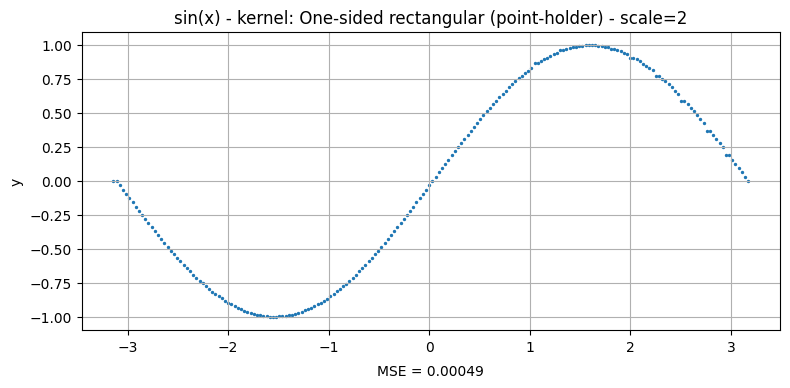

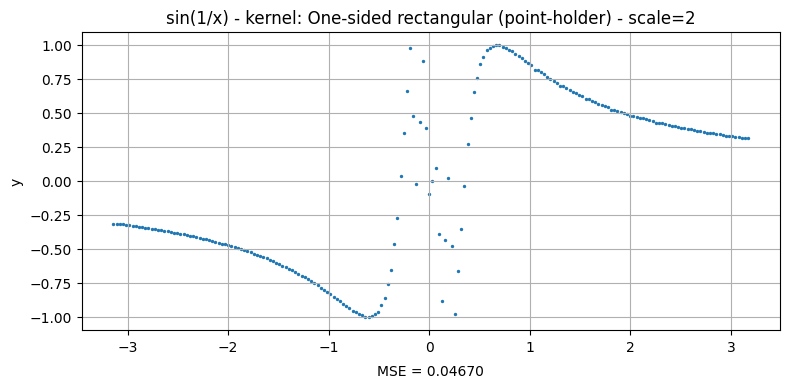

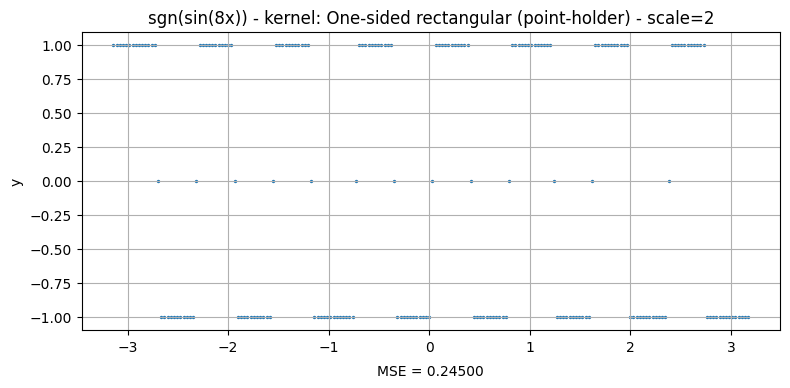

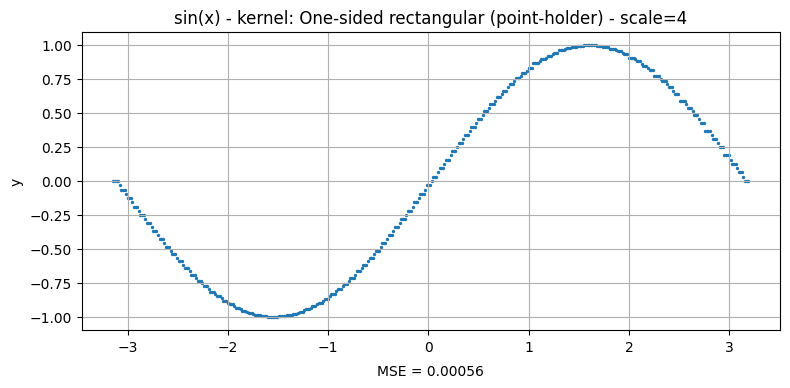

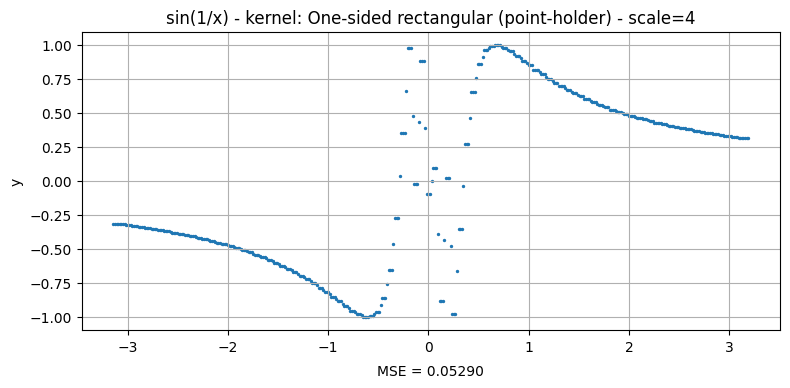

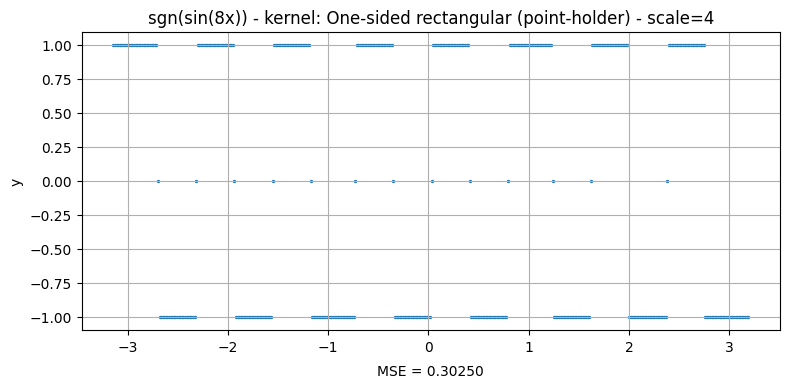

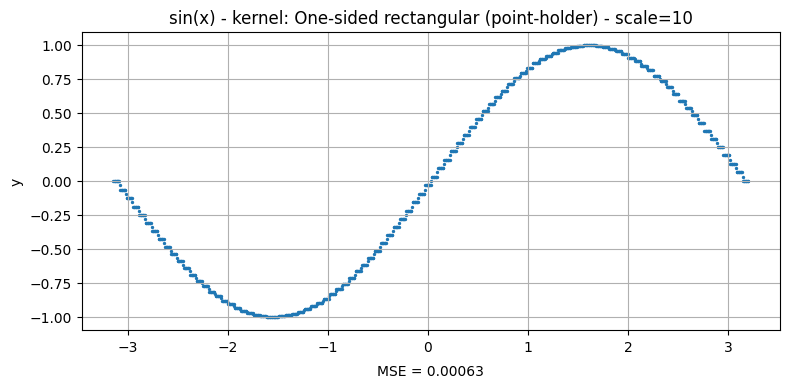

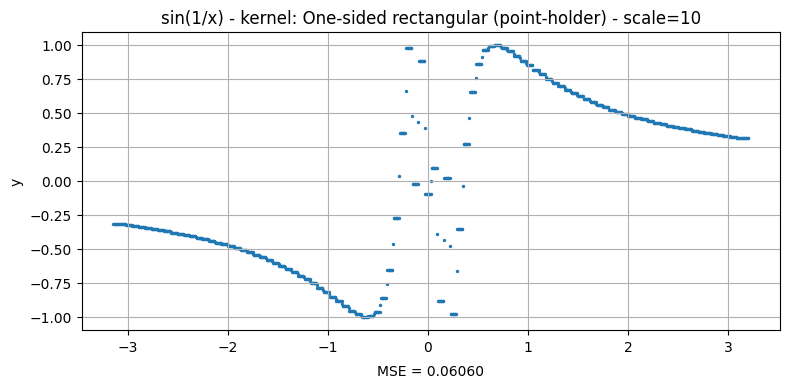

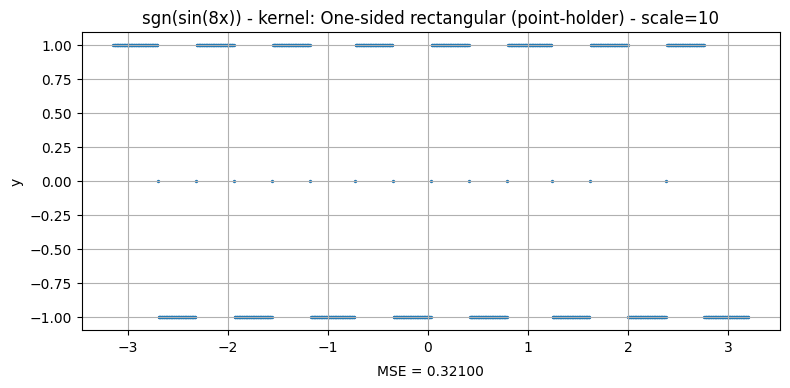

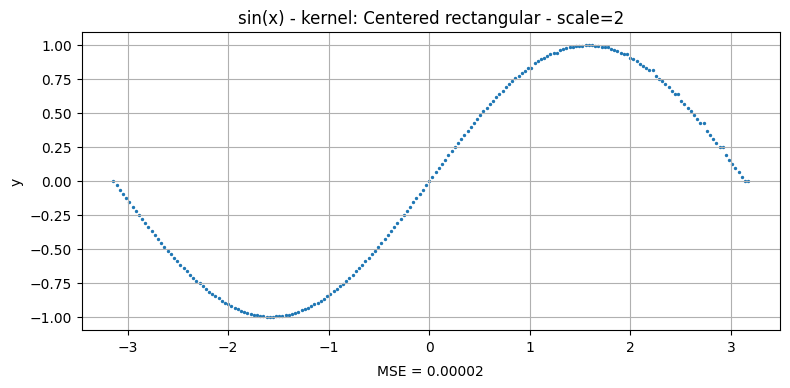

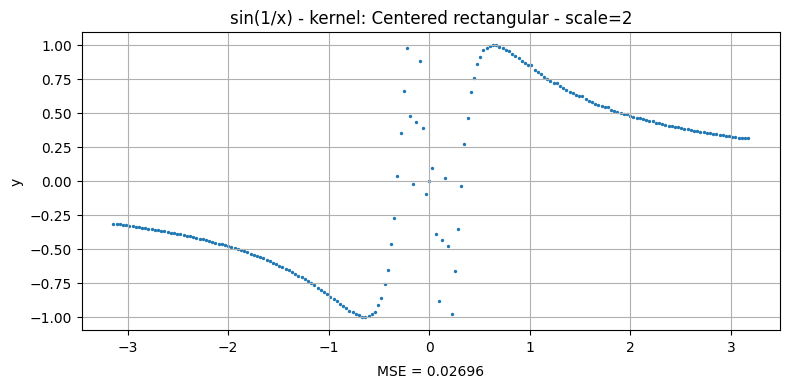

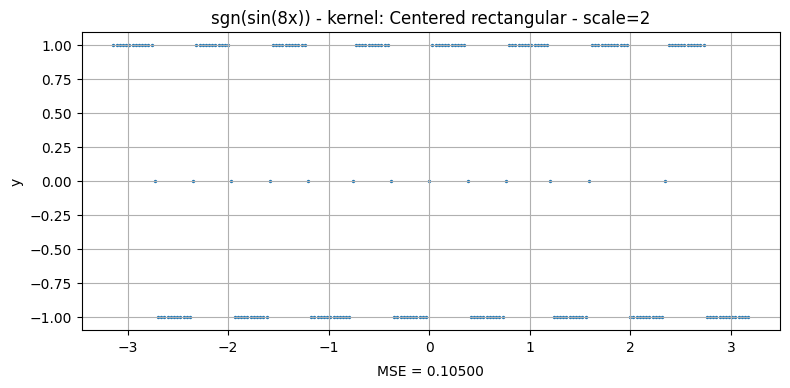

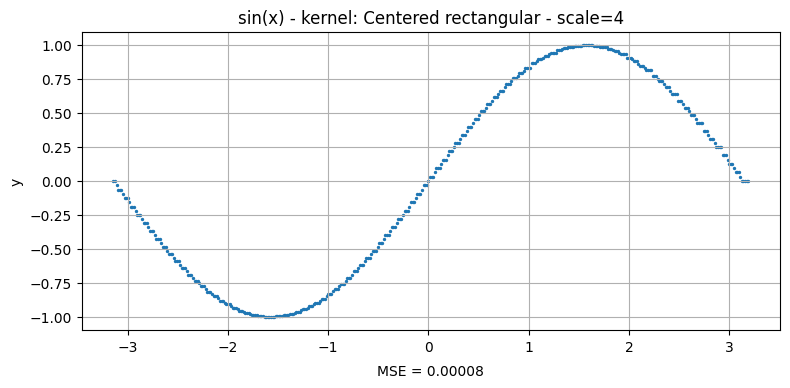

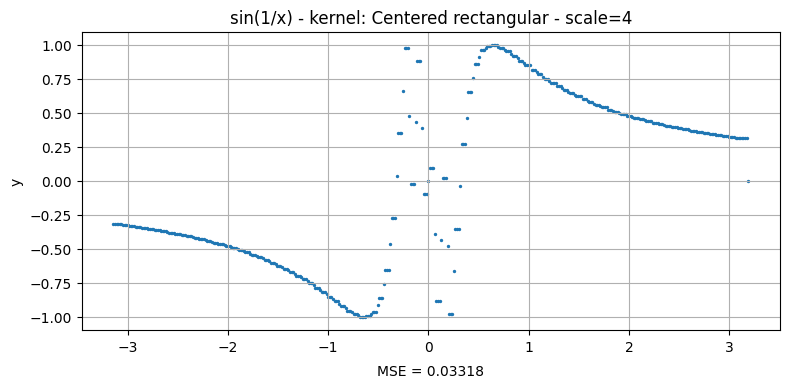

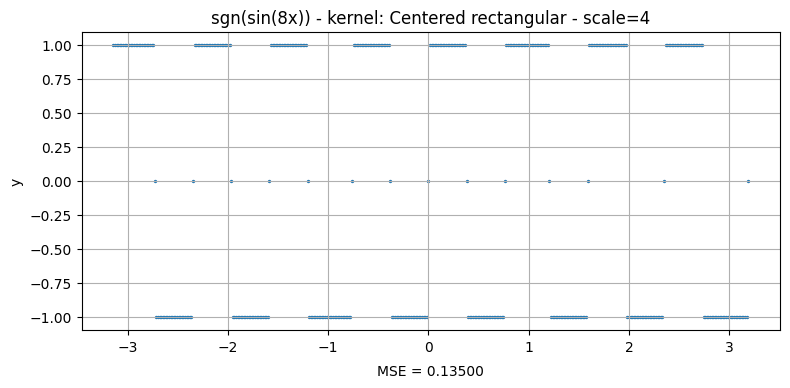

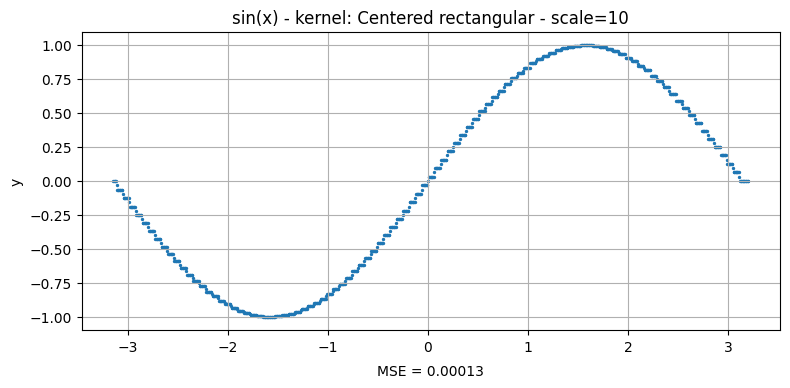

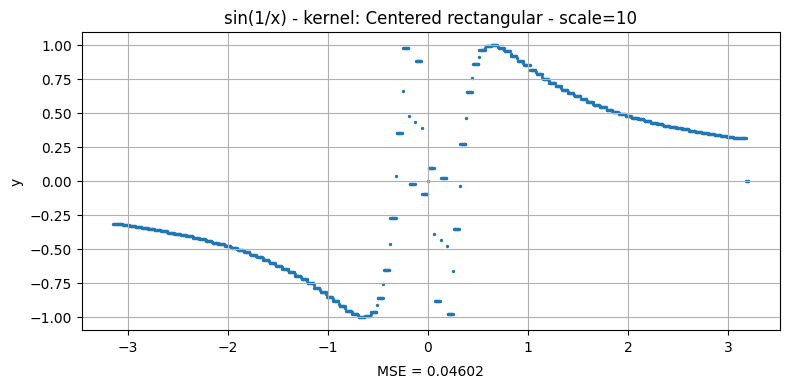

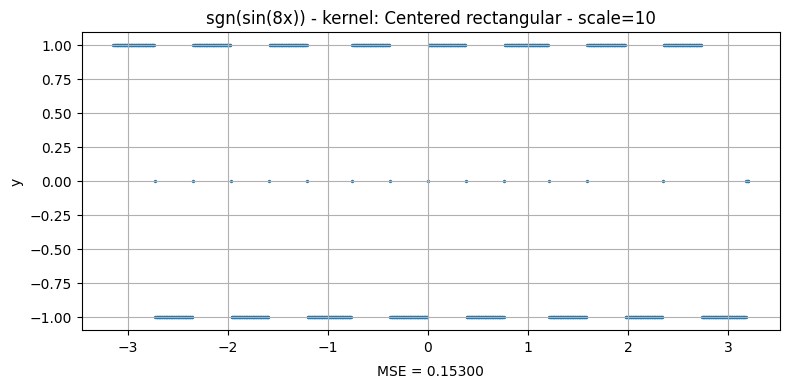

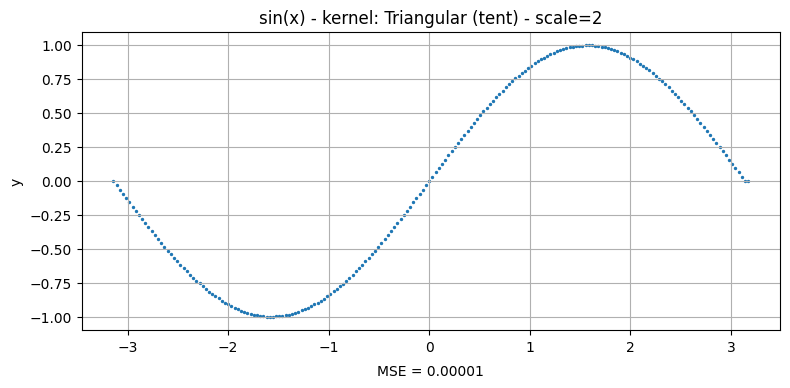

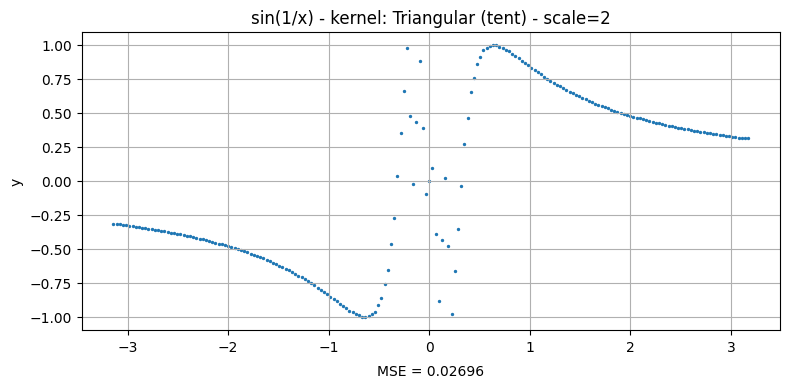

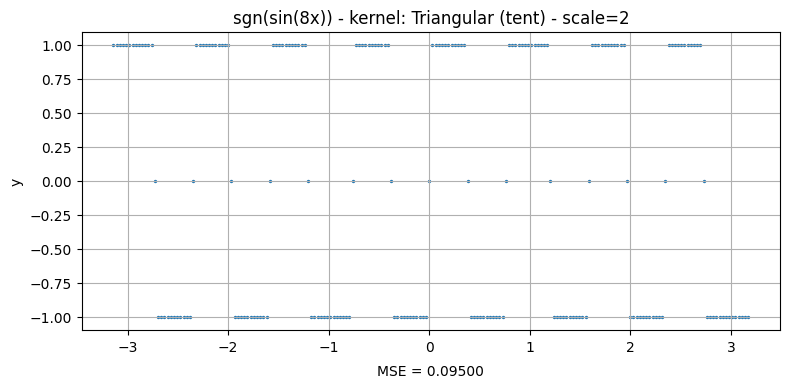

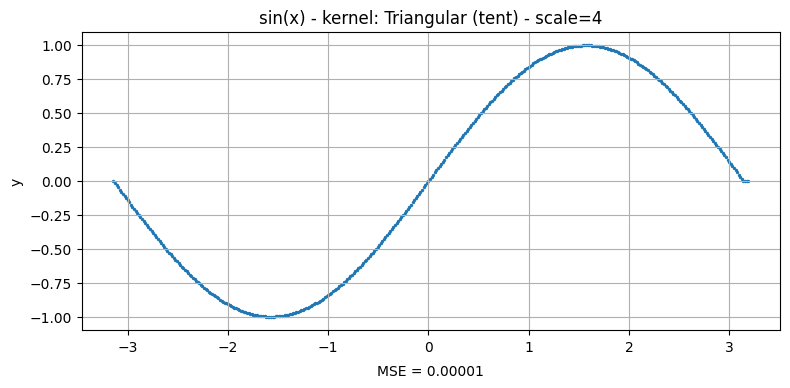

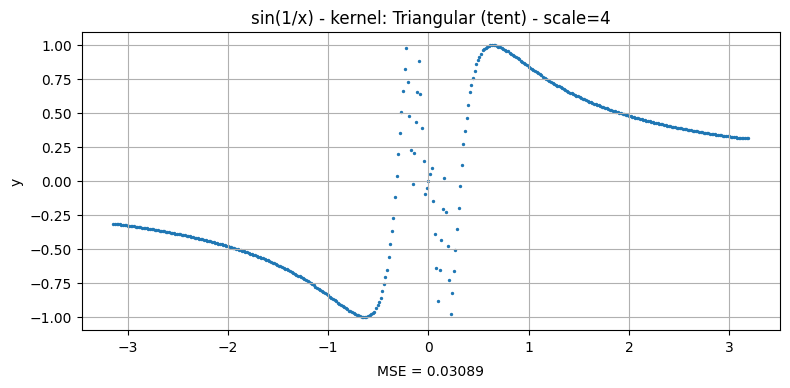

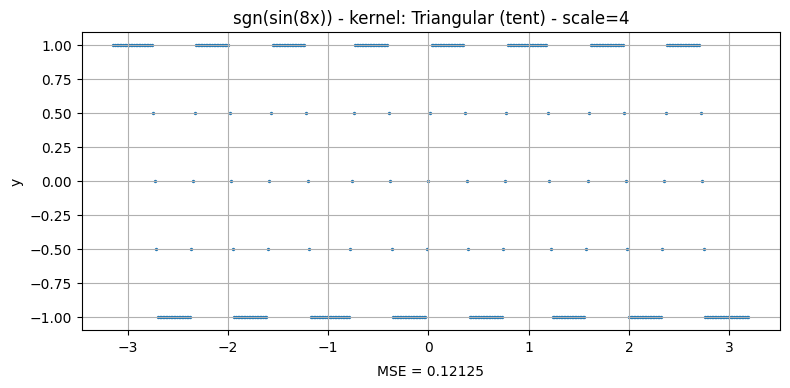

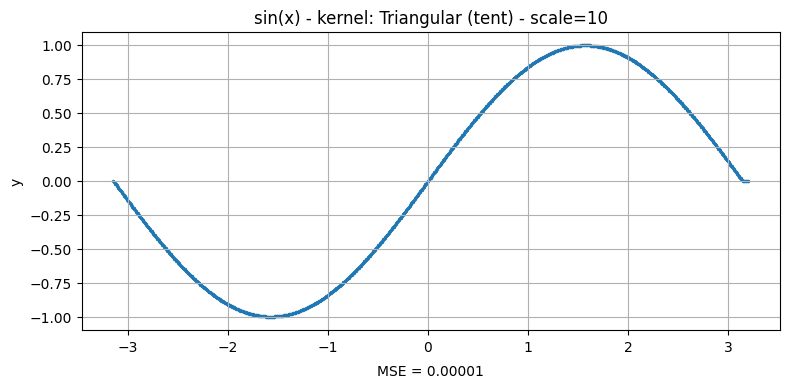

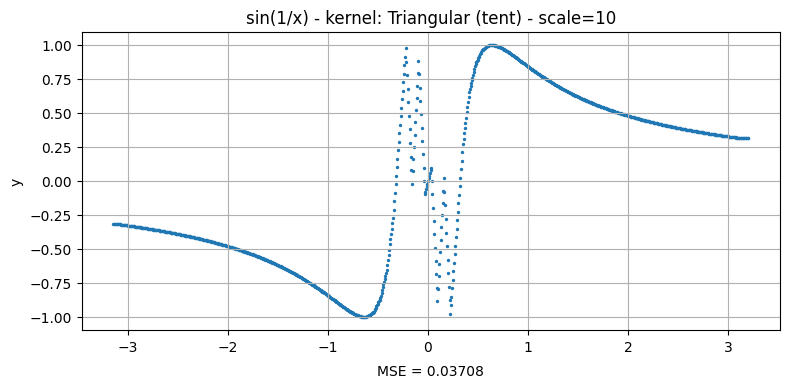

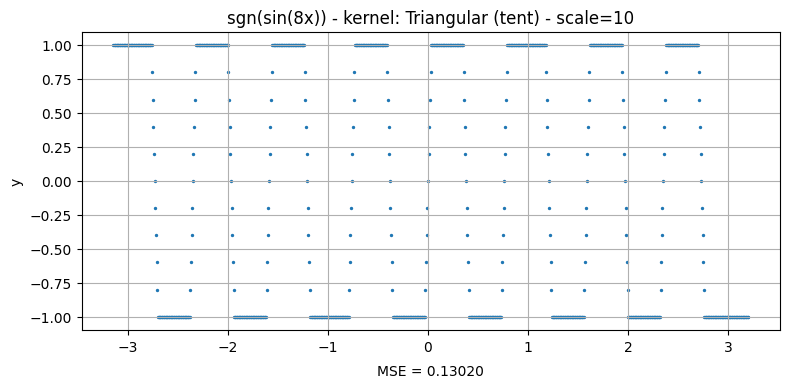

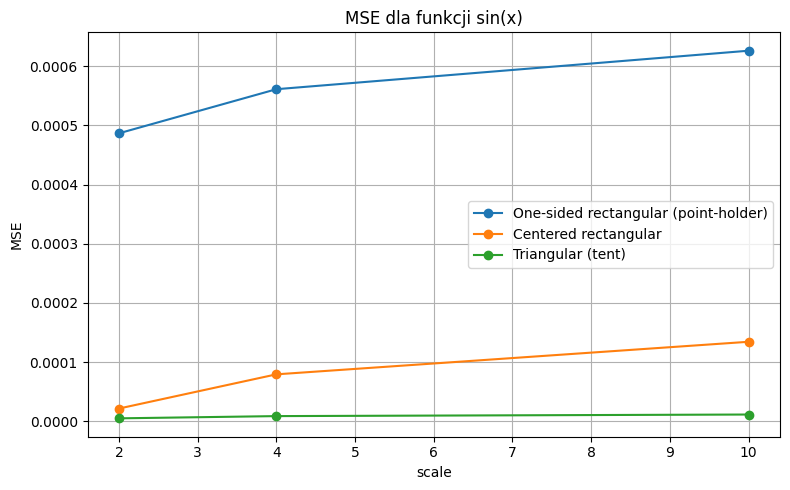

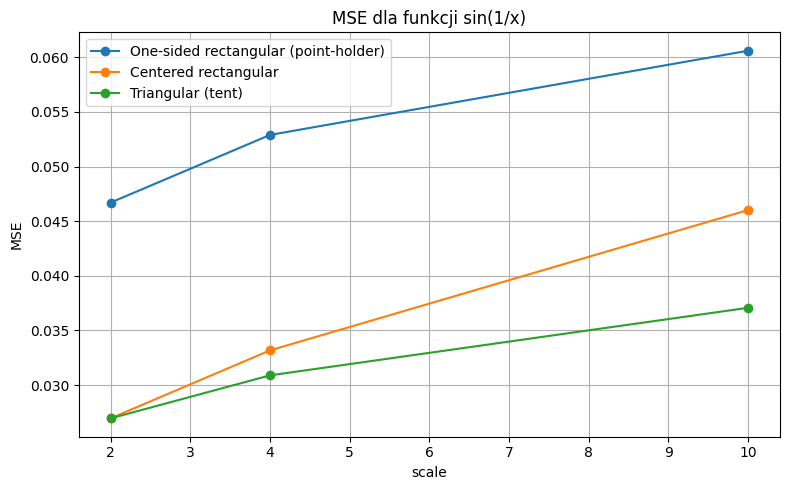

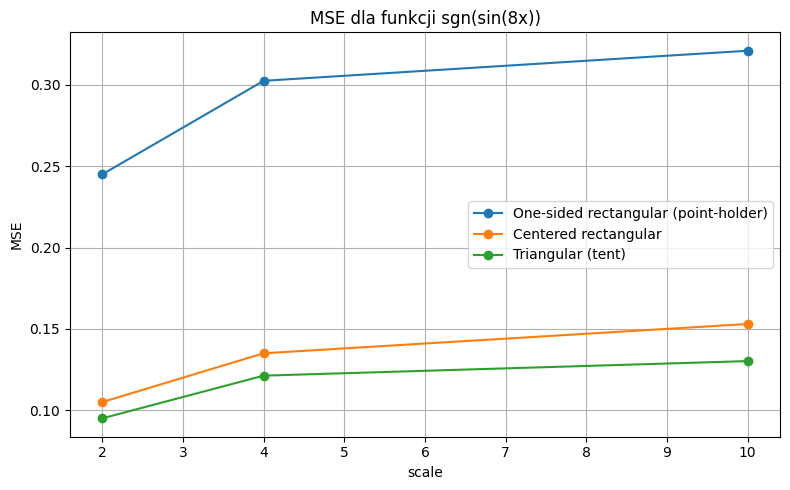

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Funkcje
def f1(x):
    return np.sin(x)
def f2(x):
    return np.sin(1/x)
def f3(x):
    return np.sign(np.sin(8*x))

# Dane
x = np.linspace(-np.pi, np.pi, 100)
y1 = f1(x)
y2 = f2(x)
y3 = f3(x)

# Scale i kerneli
scale_table = [2, 4, 10]
kernels = ["k1", "k2", "k3"]
kernel_names = {
    "k1": "One-sided rectangular (point-holder)",
    "k2": "Centered rectangular",
    "k3": "Triangular (tent)"
}

row_titles = ["sin(x)", "sin(1/x)", "sgn(sin(8x))"]
y_funcs = [y1, y2, y3]
f_funcs = [f1, f2, f3]

# Utworzenie pustej tabeli MSE
mse_table = pd.DataFrame(columns=["kernel", "scale", "function", "MSE"])

# --- Interpolacje i zapisy wykresów ---
for kernel in kernels:
    for scale in scale_table:
        for i, (y, f, title) in enumerate(zip(y_funcs, f_funcs, row_titles)):

            # Interpolacja
            x_new, y_new = interpolacja1D(x, y, kernel, scale)

            # Obliczenie MSE
            y_true = f(x_new)
            mse_val = MSE(y_true, y_new)

            # Dodanie do tabeli
            mse_table = pd.concat([mse_table, pd.DataFrame([
                {"kernel": kernel, "scale": scale, "function": title, "MSE": mse_val}
            ])], ignore_index=True)

            # Rysowanie wykresu interpolacji
            plt.figure(figsize=(8, 4))
            plt.scatter(x_new, y_new, s=2)
            plt.title(f"{title} - kernel: {kernel_names[kernel]} - scale={scale}")
            plt.ylabel("y")
            plt.grid(True)
            plt.annotate(f"MSE = {mse_val:.5f}", xy=(0.5, -0.15), xycoords='axes fraction', ha='center')
            plt.tight_layout()
            
            # Zapis do pliku
            filename = f"{title.replace('/', '_')}_{kernel}_{scale}.png"
            plt.savefig(filename)
            plt.show()
            plt.close()

# --- Wykresy MSE dla każdej funkcji (po jednym figure dla funkcji) ---
for i, func in enumerate(row_titles):
    plt.figure(figsize=(8, 5))
    for kernel in kernels:
        df = mse_table[(mse_table["function"] == func) & (mse_table["kernel"] == kernel)]
        plt.plot(df["scale"], df["MSE"], marker='o', label=kernel_names[kernel])
    
    plt.title(f"MSE dla funkcji {func}")
    plt.xlabel("scale")
    plt.ylabel("MSE")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    
    # Zapis wykresu MSE do pliku
    filename = f"MSE_{func.replace('/', '_')}.png"
    plt.savefig(filename)
    plt.show()
    plt.close()


# Wplyw ilości i rozmieszczenia punktów na jakość interpolacji | kryterium MSE

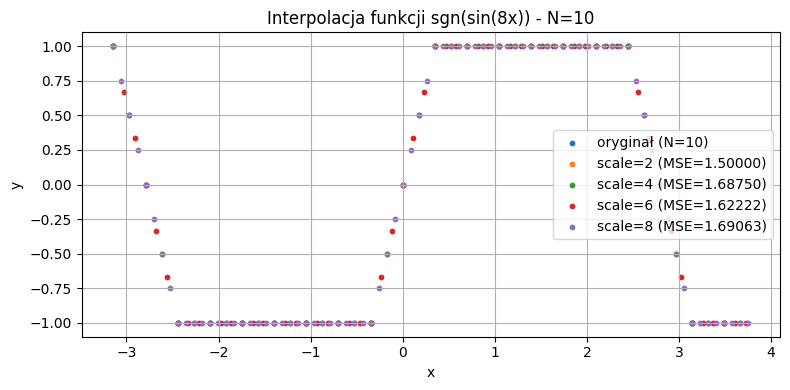

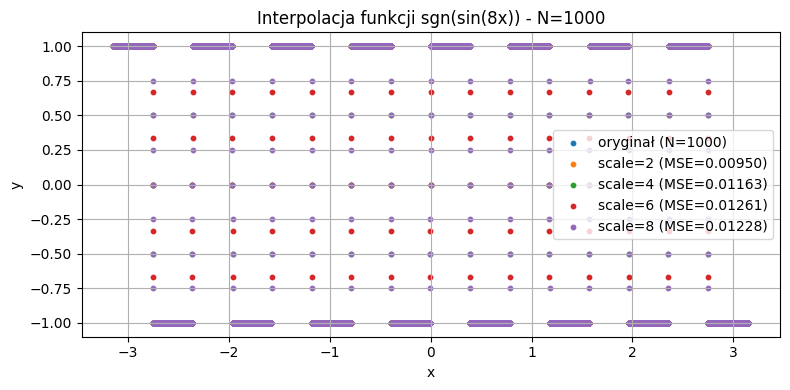

In [31]:
x1 = np.linspace(-np.pi,np.pi,10)
x2 = np.linspace(-np.pi,np.pi,1000)
y1 = f3(x1)
y2 = f3(x2)
kernel = "k3"
x1_s2, y1_s2 = interpolacja1D(x1,y1,kernel,2)
y1_s2_res = f3(x1_s2)
x1_s4, y1_s4 = interpolacja1D(x1,y1,kernel,4)
y1_s4_res = f3(x1_s4)
x1_s6, y1_s6 = interpolacja1D(x1,y1,kernel,6)
y1_s6_res = f3(x1_s6)
x1_s8, y1_s8 = interpolacja1D(x1,y1,kernel,8)
y1_s8_res = f3(x1_s8)

x2_s2, y2_s2 = interpolacja1D(x2,y2,kernel,2)
y2_s2_res = f3(x2_s2)
x2_s4, y2_s4 = interpolacja1D(x2,y2,kernel,4)
y2_s4_res = f3(x2_s4)
x2_s6, y2_s6 = interpolacja1D(x2,y2,kernel,6)
y2_s6_res = f3(x2_s6)
x2_s8, y2_s8 = interpolacja1D(x2,y2,kernel,8)
y2_s8_res = f3(x2_s8)

mse1_s2=MSE(y1_s2_res,y1_s2)
mse1_s4=MSE(y1_s4_res,y1_s4)
mse1_s6=MSE(y1_s6_res,y1_s6)
mse1_s8=MSE(y1_s8_res,y1_s8)

mse2_s2=MSE(y2_s2_res,y2_s2)
mse2_s4=MSE(y2_s4_res,y2_s4)
mse2_s6=MSE(y2_s6_res,y2_s6)
mse2_s8=MSE(y2_s8_res,y2_s8)

scales = [2, 4, 6, 8]
x_sets = [x1, x2]
y_sets = [y1, y2]
x_interp_sets = [[x1_s2, x1_s4, x1_s6, x1_s8],
                 [x2_s2, x2_s4, x2_s6, x2_s8]]
y_interp_sets = [[y1_s2, y1_s4, y1_s6, y1_s8],
                 [y2_s2, y2_s4, y2_s6, y2_s8]]
mse_sets = [[mse1_s2, mse1_s4, mse1_s6, mse1_s8],
            [mse2_s2, mse2_s4, mse2_s6, mse2_s8]]
N_labels = ["10", "1000"]

for idx in range(2):
    plt.figure(figsize=(8, 4))
    plt.scatter(x_sets[idx], y_sets[idx], s=10, label=f"oryginał (N={N_labels[idx]})")
    
    for xi, yi, scale, mse_val in zip(x_interp_sets[idx], y_interp_sets[idx], scales, mse_sets[idx]):
        plt.scatter(xi, yi, s=10, label=f"scale={scale} (MSE={mse_val:.5f})")
    
    plt.title(f"Interpolacja funkcji sgn(sin(8x)) - N={N_labels[idx]}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"sgn_sin8x_N{N_labels[idx]}.png")
    plt.show()
    plt.close()


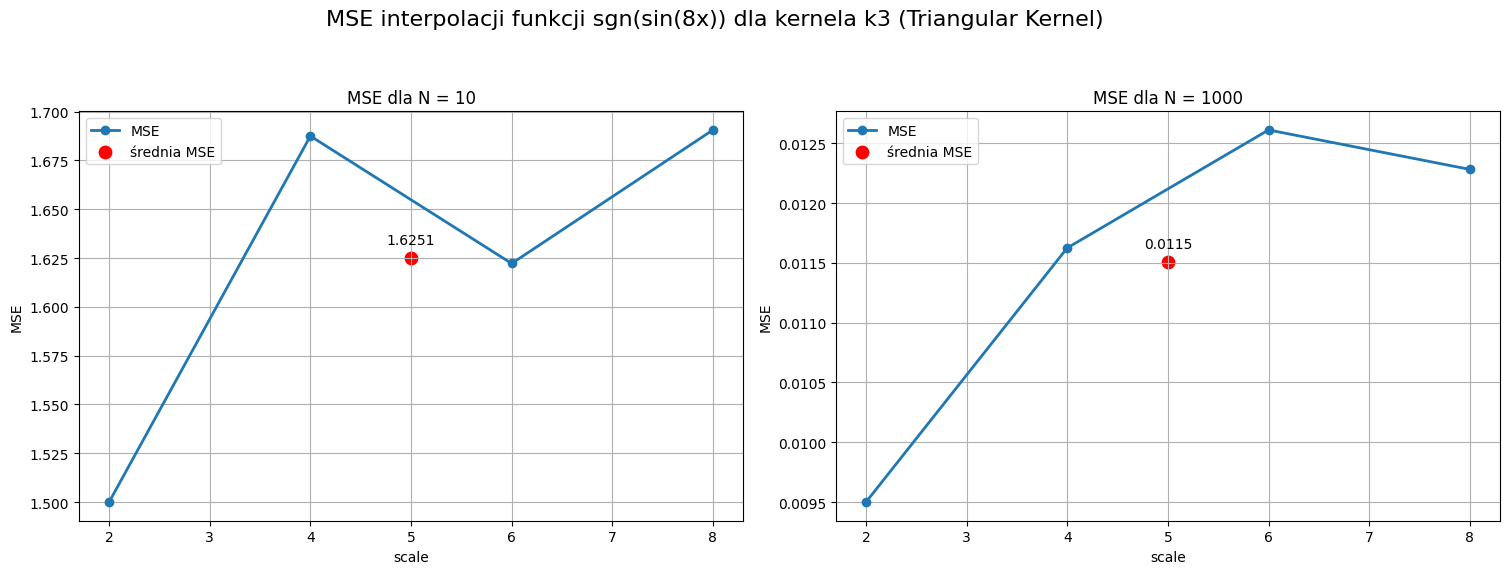

In [10]:
# Skale
scales = [2, 4, 6, 8]

# MSE dla N = 10
mse_N10 = [mse1_s2, mse1_s4, mse1_s6, mse1_s8]
mean_N10 = np.mean(mse_N10)

# MSE dla N = 1000
mse_N1000 = [mse2_s2, mse2_s4, mse2_s6, mse2_s8]
mean_N1000 = np.mean(mse_N1000)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("MSE interpolacji funkcji sgn(sin(8x)) dla kernela k3 (Triangular Kernel)", fontsize=16)

# --- Wykres MSE dla N = 10 ---
axs[0].plot(scales, mse_N10, marker='o', linewidth=2, label="MSE")
axs[0].scatter([np.mean(scales)], [mean_N10], color="red", s=80, label="średnia MSE")
axs[0].annotate(f"{mean_N10:.4f}", (np.mean(scales), mean_N10),
                textcoords="offset points", xytext=(0,10), ha='center')

axs[0].set_title("MSE dla N = 10")
axs[0].set_xlabel("scale")
axs[0].set_ylabel("MSE")
axs[0].grid(True)
axs[0].legend()

# --- Wykres MSE dla N = 1000 ---
axs[1].plot(scales, mse_N1000, marker='o', linewidth=2, label="MSE")
axs[1].scatter([np.mean(scales)], [mean_N1000], color="red", s=80, label="średnia MSE")
axs[1].annotate(f"{mean_N1000:.4f}", (np.mean(scales), mean_N1000),
                textcoords="offset points", xytext=(0,10), ha='center')

axs[1].set_title("MSE dla N = 1000")
axs[1].set_xlabel("scale")
axs[1].set_ylabel("MSE")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout(rect=[0.05, 0.03, 1, 0.93])
plt.show()
plt.close()


# Dodatkowe 5 - różnica pomiędzy interpolacja wielokrotną a, pojedyncza 

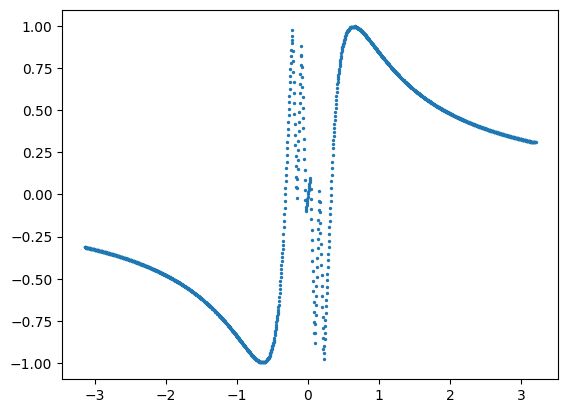

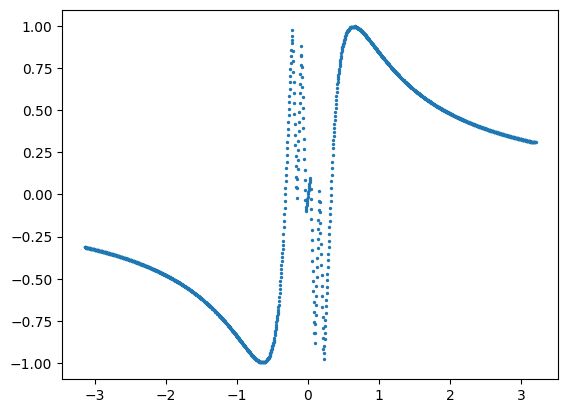

0.036252975643022475
0.036252975643015654


In [36]:
x = np.linspace(-np.pi,np.pi,100)
y = f2(x)
kernel = "k3"
x_s16, y_s16 = interpolacja1D(x,y,kernel,16)
y_res1 = f2(x_s16)
mse1 = MSE(y_res1,y_s16)
plt.scatter(x_s16,y_s16,s=2)
plt.savefig("pojedyncze16.png")
plt.show()
plt.close()

# 4 krotnie interpolcja skala2

xm_s2, ym_s2 = interpolacja1D(x,y,kernel,2)
xm_s4, ym_s4 = interpolacja1D(xm_s2,ym_s2,kernel,2)
xm_s8, ym_s8 = interpolacja1D(xm_s4,ym_s4,kernel,2)
xm_s16, ym_s16 = interpolacja1D(xm_s8,ym_s8,kernel,2)
y_res2 = f2(xm_s16)
mse2 = MSE(y_res2,ym_s16)
plt.scatter(x_s16,y_s16,s=2)
plt.savefig("multi16.png")
plt.show()
plt.close()
print(mse1)
print(mse2)